In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')


## Problem 1
### Part 1
**We do not have graduate students in our group.**

### Part 2
#### A

In [3]:
def sample_function(n=30, x_range=(0, 2*np.pi)):
    x_samples = np.random.uniform(x_range[0], x_range[1], n)
    return x_samples

def y_given_x(x, var=0.2):
    return np.random.normal(np.sin(x), var)

def generate_samples(n=30):
    x_samples = sample_function(n=n)
    y_samples = np.array([y_given_x(x) for x in x_samples])
    return x_samples, y_samples

#### B

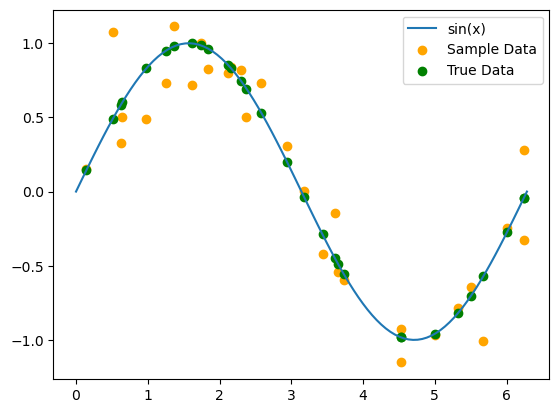

In [4]:
sample_x, sample_y = generate_samples(n=30)

plt.plot(np.linspace(0, 2*np.pi, 100), np.sin(np.linspace(0, 2*np.pi, 100)), label='sin(x)')
plt.scatter(sample_x, sample_y, label='Sample Data', color='orange')
plt.scatter(sample_x, np.sin(sample_x), label='True Data', color='green')
plt.legend()
plt.show()

#### C

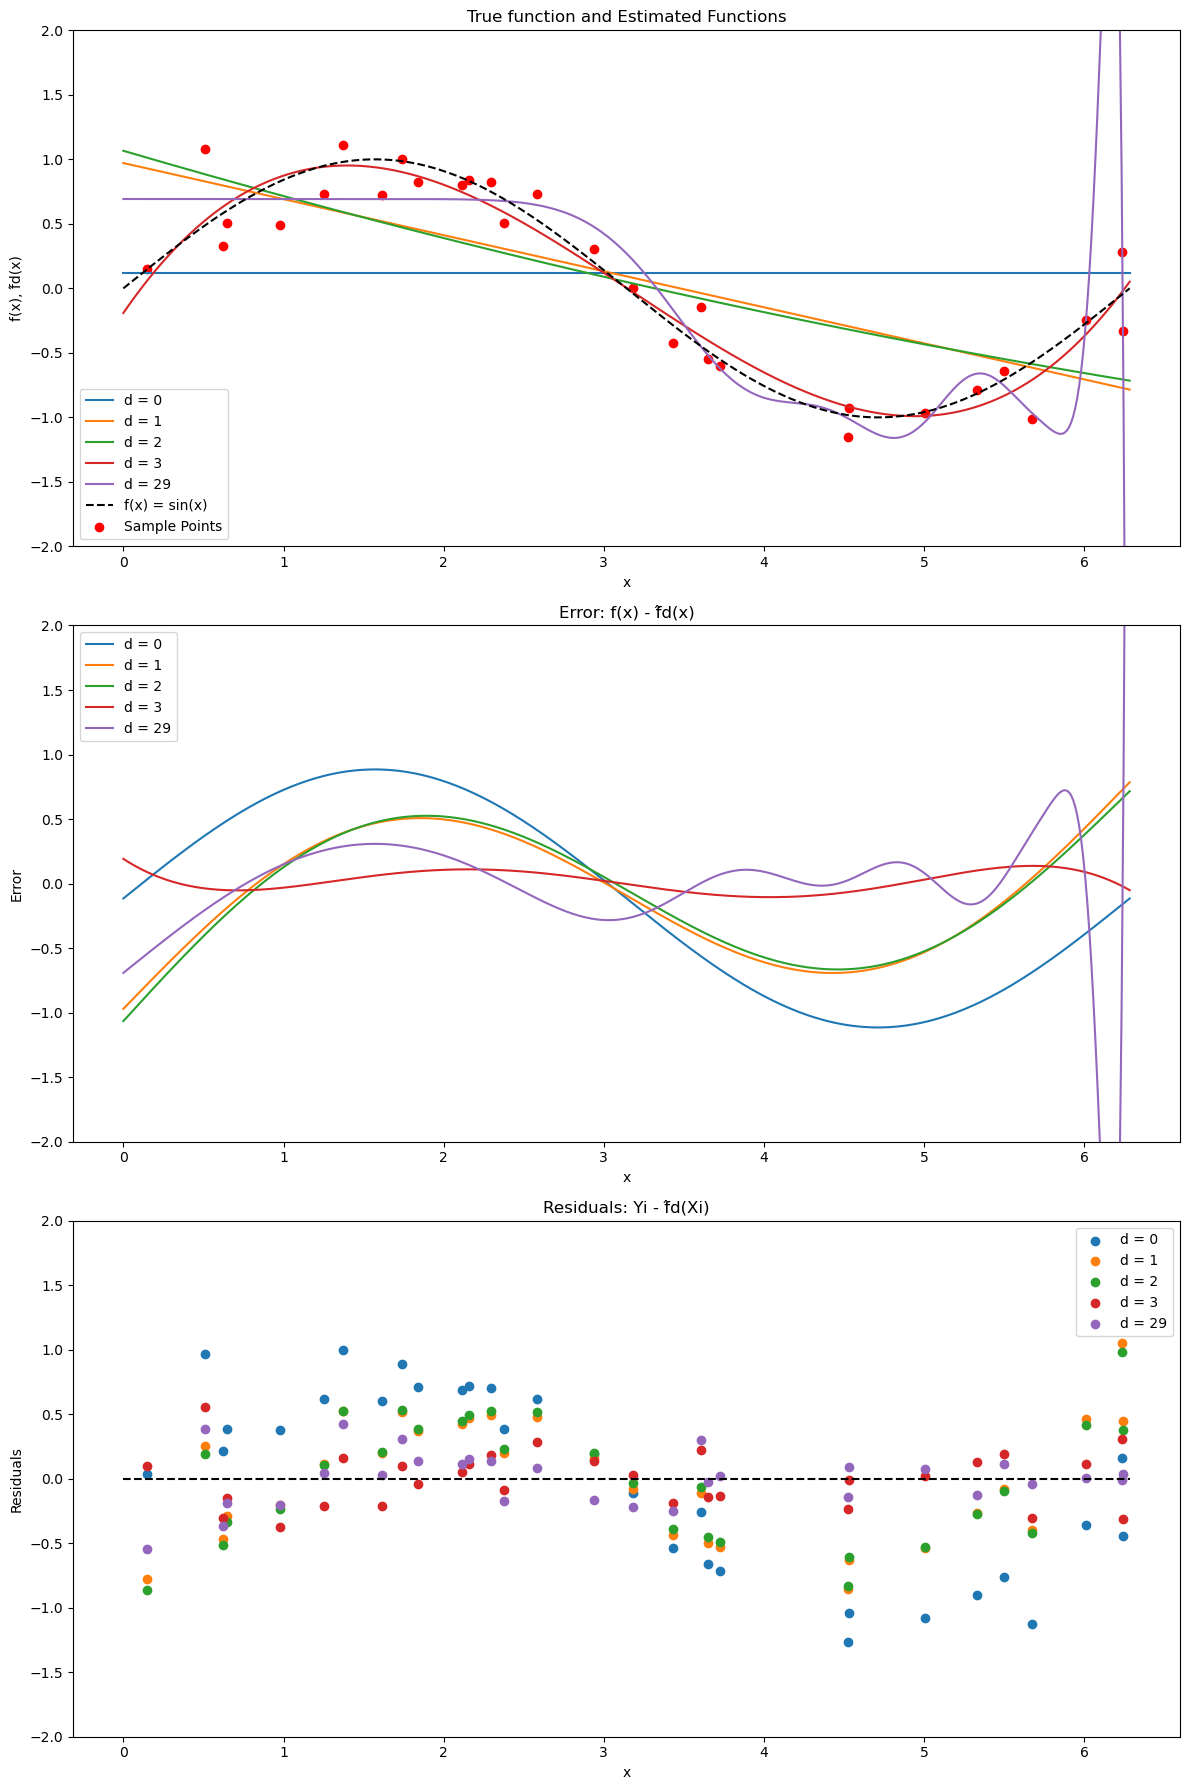

In [14]:
degrees = [0, 1, 2, 3, 29]
y_axis_limits = (-2, 2)

x_plot = np.linspace(0, 2 * np.pi, 500)

fig, axs = plt.subplots(3, 1, figsize=(12, 18))
colors = sns.color_palette("tab10", len(degrees))

for i, d in enumerate(degrees):
    poly = PolynomialFeatures(degree=d)
    x_poly = poly.fit_transform(sample_x.reshape(-1, 1))

    model = LinearRegression()
    model.fit(x_poly, sample_y)
    x_plot_poly = poly.transform(x_plot.reshape(-1, 1))
    y_plot_pred = model.predict(x_plot_poly)

    axs[0].plot(x_plot, y_plot_pred, label=f'd = {d}', color=colors[i])

axs[0].plot(x_plot, np.sin(x_plot), label='f(x) = sin(x)', color='black', linestyle='--')
axs[0].scatter(sample_x, sample_y, color='red', label='Sample Points')
axs[0].set_title('True function and Estimated Functions')
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x), f̂d(x)')
axs[0].set_ylim(y_axis_limits)
axs[0].legend()

# Plot error f(x) - f̂d(x)
for i, d in enumerate(degrees):
    poly = PolynomialFeatures(degree=d)
    x_poly = poly.fit_transform(sample_x.reshape(-1, 1))
    model = LinearRegression()
    model.fit(x_poly, sample_y)
    x_plot_poly = poly.transform(x_plot.reshape(-1, 1))
    y_plot_pred = model.predict(x_plot_poly)
    error = np.sin(x_plot) - y_plot_pred

    axs[1].plot(x_plot, error, label=f'd = {d}', color=colors[i])

axs[1].set_title('Error: f(x) - f̂d(x)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('Error')
axs[1].set_ylim(y_axis_limits)
axs[1].legend()

# Plot residuals Yi - f̂d(Xi)
for i, d in enumerate(degrees):
    poly = PolynomialFeatures(degree=d)
    x_poly = poly.fit_transform(sample_x.reshape(-1, 1))
    model = LinearRegression()
    model.fit(x_poly, sample_y)
    residuals = sample_y - model.predict(x_poly)

    axs[2].scatter(sample_x, residuals, label=f'd = {d}', color=colors[i])

axs[2].hlines(0, 0, 2*np.pi, colors='black', linestyles='dashed')
axs[2].set_title('Residuals: Yi - f̂d(Xi)')
axs[2].set_xlabel('x')
axs[2].set_ylabel('Residuals')
axs[2].set_ylim(y_axis_limits)
axs[2].legend()

plt.tight_layout()
plt.show()

#### D

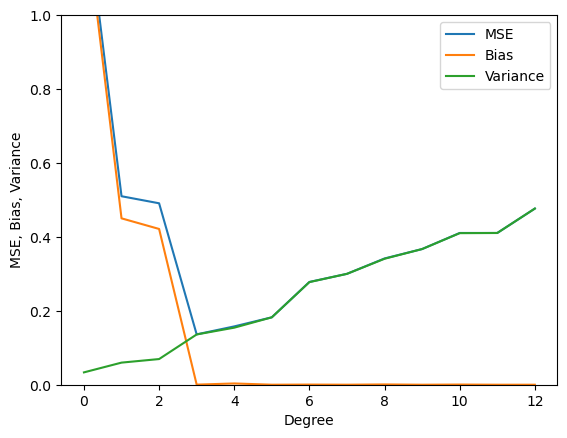

In [21]:
models_full = {degg: None for degg in range(13)}
for degg in range(13):
    poly = PolynomialFeatures(degree=degg)
    x_poly = poly.fit_transform(sample_x.reshape(-1, 1))
    model = LinearRegression()
    model.fit(x_poly, sample_y)
    models_full[degg] = model

x_star = 1.5 * np.pi
mse = []
bias = []
variance = []

for degg in range(13):
    poly = PolynomialFeatures(degree=degg)
    x_poly_star = poly.fit_transform(np.array([x_star]).reshape(-1, 1))
    model = models_full[degg]

    y_star_preds = []
    for _ in range(1000):
        new_sample_y = np.sin(sample_x) + np.random.normal(0, 1, size=sample_x.shape)
        new_model = LinearRegression().fit(poly.transform(sample_x.reshape(-1, 1)), new_sample_y)
        y_star_pred = new_model.predict(x_poly_star)
        y_star_preds.append(y_star_pred)

    y_star_preds = np.array(y_star_preds).squeeze()
    mse.append(np.mean((np.sin(x_star) - y_star_preds) ** 2))
    bias.append((np.sin(x_star) - np.mean(y_star_preds)) ** 2)
    variance.append(np.var(y_star_preds))

# plot each term as a function of degree
plt.plot(range(13), mse, label='MSE')
plt.plot(range(13), bias, label='Bias')
plt.plot(range(13), variance, label='Variance')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('MSE, Bias, Variance')
plt.ylim(0, 1)
plt.show()

#### E
From the figures above, we can clearly see the trade-off between overfitting and underfitting as exemplified by the effects of increasing the degree of the polynomial that is fit to the data. Looking at the first three graphs, we can see that we obviously need a few degrees on our polynomial model otherwise we will get get a line with 0 slope or a simple linear trend. In both of these cases, we are underfitting out data. Visually, we can see that for high degree polynomials, the model fits the training data very well, but does not fit the actual function. This is because we have too many degrees of freedom and are overfitting the data. This is why we see the test error increase as the degree of the polynomial increases. Note that it is interesting in this case since we know (from math), that the true function can be very well approximated by polynomials. (The fact that sine can be approximated by polynomials is a basic result of Laurent Series and Fourier Analysis). However, in the context of model fitting, we only have data over a finite range, which is what leads to and abrupt turn towards positive or negative infinity at the end of the range of the data. We have an odd polynomial, so the function will go to positive infinity on one side and negative infinity on the other, and our finite range means it happens just after our last data point.

In terms of the decomposition, we see that the MSE in our data follows the cannoical decomposition, however the curves might not be as smooth as we might hope. We can see that variance increases as complexity increases while our bias decreases. Ideally, this graph would be smoother and these curves would appear quadratic or rational in nature, but we are using relative small amounts of data in a toy example. This graph shows that our model complexity is "ideal" somewhere around 3-4 degrees. This aligns with what we see in or testing as the 3rd degree polynomial fit the data the best and there was not clear under or overfitting.

### Part 3


## Problem 2

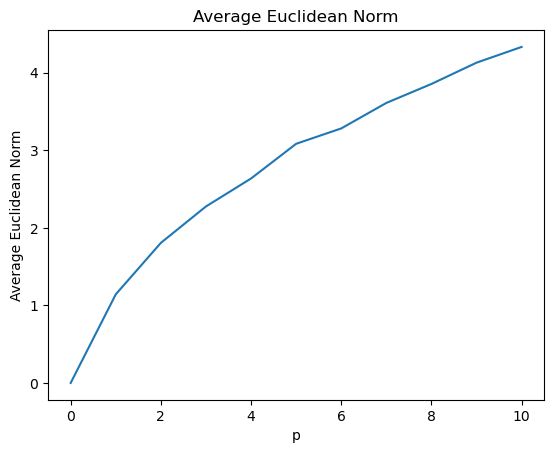

In [6]:
# Random Vector Function
def random_vector_function(p=0, var=1):
    X_1 = np.array(np.random.normal(0, var, p))
    X_2 = np.array(np.random.normal(0, var, p))
    euclidean_norm = np.sqrt(np.sum((X_1 - X_2)**2))
    return euclidean_norm

p_s = [i for i in range(0, 11)]
totals = []

for p in p_s:
    total = 0
    for i in range(1000):
        total += random_vector_function(p=p)
    total /= 1000
    totals.append(total)

# Graph
plt.plot(p_s, totals)
plt.title('Average Euclidean Norm')
plt.xlabel('p')
plt.ylabel('Average Euclidean Norm')
plt.show()


The above a graph represents the curse of dimensionality--essentially the idea that statistics and math become less intuitive and more "difficult" in high dimensions. Here, we see that the two random vectors indeed get "farther apart" as dimension increases. This result intuitively makes sense, as there are more degrees of freedom and thus "more ways to be different." However, we notice that the distance increase between these random vectors begins to slow as dimension increases. This is a result of concentration, the idea that in high dimensions that odds of extreme results begin to diminish. Consider a very "radical" vector that is very far from the origin. In low dimensions, this simply means that one or two extreme events have occurred such that the the resultant vector is far from the origin. But as dimension increases, for this vector to remain just as far from the origin, more and more extreme events must occur. This is why the distance between the two random vectors increases at a decreasing rate as dimension increases. Thus, this graph nicely demonstrates the curse of dimensionality and shows how in high dimensions, lots of random data tends to "look the same."